In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import numpy as np
import scipy as sp
import anndata
import scipy
from matplotlib import pyplot as plt
import gc
from collections import Counter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

In [2]:
def plot_spatil_test(tmp_slide, ct_list, ncols, spot_size, vmax):
    with mpl.rc_context({'axes.facecolor':  'white',
                         "font.size":20,
                         'figure.figsize': [8, 8]}):

        fig = sc.pl.spatial(tmp_slide, cmap="RdPu",
                      # show first 8 cell types
                      color=ct_list,
                      title = '',
                      ncols=ncols, size=1.5,
                      img_key=None,
                      spot_size=spot_size,
                      # limit color scale at 99.2% quantile of cell abundance
                      vmin=0, vmax=vmax,
                      return_fig = True
                     )
        fig[0].set_xlabel('')
        fig[0].set_ylabel('')
        return fig
def output_img(a,fn):
    a[0].figure.delaxes(a[0].figure.axes[1])
    divider = make_axes_locatable(a[0])
    cax = divider.append_axes("right", size="4%", pad="1.5%")
    cb = plt.colorbar(a[0].collections[0], cax=cax)
    cb.ax.tick_params(labelsize=30)
    a[0].figure.savefig(fn, format="png", bbox_inches="tight")
    gc.collect()

In [3]:
spot_size = 1

In [4]:
st_adata_pixel=anndata.read_h5ad('D:\\Data\\pixel_seq\\pixel_ob_50.h5ad')
select_idx_ls = []
for idx in range(len(st_adata_pixel.obs['x'])):
    if st_adata_pixel.obs['x'][idx] > 720 and st_adata_pixel.obs['x'][idx] <1200:
        select_idx_ls.append(idx)


In [ ]:
st_adata_pixel_dest=anndata.read_h5ad('D:\\Data\\for_publication\\olfactory_bulb\\pixel-seq\\destvi_prop.h5ad')
st_adata_pixel_dest.obs[st_adata_pixel_dest.obsm['proportions'].columns] = st_adata_pixel_dest.obsm['proportions']

In [7]:
dest_select_idx_ls = []
for idx in range(len(st_adata_pixel_dest.obs['x'])):
    if st_adata_pixel_dest.obs['x'][idx] > 720 and st_adata_pixel_dest.obs['x'][idx] <1200:
        dest_select_idx_ls.append(idx)

In [8]:
st_adata=anndata.read_h5ad('D:\\Data\\for_publication\\olfactory_bulb\\stereo_seq\\st_Mouse_olfa_S1.h5ad')



In [9]:
file_path = 'D:/Data/stereo-seq/olfactory_bulb/stVAE_mu_gene_expression.csv'
raw_mu_expr = pd.read_csv(file_path,index_col=0)
filter_ct_n = list(raw_mu_expr.index)

In [10]:
ct_label_file = 'D:/Data/stereo-seq/olfactory_bulb/stVAE_cell_type_proportion.csv'

ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
ct_label = ct_label_df.drop("Unnamed: 0",axis=1)

ct_label.columns = filter_ct_n
ct_label.index = st_adata.obs_names
st_adata.obs[filter_ct_n] = ct_label
#tmp_slide_1472_n = anndata.AnnData(st_adata.X, obs=st_adata.obs, var=st_adata.var, uns=st_adata.uns,obsm=st_adata.obsm)
stVAE_OB_stereo_seq= anndata.AnnData(st_adata.X, obs=st_adata.obs, var=st_adata.var, uns=st_adata.uns,obsm=st_adata.obsm)

In [ ]:
import gc
s3= 'p99.5'
save_path = 'D:\\plot_spatial\\olfactory\\n_new\\stVAE\\'
for tmp_ct in filter_ct_n:
    a = plot_spatil_test(stVAE_OB_stereo_seq, tmp_ct, 1, spot_size, s3)
    if '/' in tmp_ct:
        tmp_ct = tmp_ct.split('/')[0]+'_'+tmp_ct.split('/')[1]
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()
    else:
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()

In [11]:
st_adata_dest=anndata.read_h5ad('D:\\Data\\for_publication\\olfactory_bulb\\stereo_seq\\destvi_prop_2000.h5ad')
st_adata_dest.obs[st_adata_dest.obsm['proportions'].columns] = st_adata_dest.obsm['proportions']
ct_label = st_adata_dest.obsm['proportions']

In [ ]:
import gc
s3= 'p99.2'
save_path = 'D:\\plot_spatial\\olfactory\\n_new\\destvi\\'
for tmp_ct in filter_ct_n:
    a = plot_spatil_test(st_adata_dest, tmp_ct, 1, spot_size, s3)
    if '/' in tmp_ct:
        tmp_ct = tmp_ct.split('/')[0]+'_'+tmp_ct.split('/')[1]
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()
    else:
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()

In [12]:
marker_dict_n = {}
marker_df = pd.read_excel('C:\\Users\\tutoradmin\\Downloads\\ob_marker.xlsx', sheet_name=None)
for index, row in marker_df['1-s2.0-S2211124718317972-mmc2'].iterrows():
    ct = row['cluster'].split('.')[1]
    marker = row['gene']
    if 'Neuron' in ct:
        continue
    if ct == 'Mf':
        ct = 'Mφ'
    if marker not in st_adata.var_names:
        continue
    if ct not in marker_dict_n:
        marker_dict_n.update({ct : [marker]})
    else:
        if len(marker_dict_n[ct]) == 4:
            continue
        marker_dict_n[ct].append(marker)
marker_df_n = pd.read_excel('C:\\Users\\tutoradmin\\Downloads\\olfactory_marker_n.xlsx', sheet_name=None)
for index, row in marker_df_n['1-s2.0-S2211124718317972-mmc3'].iterrows():
    ct = row['cluster']
    marker = row['gene']
    for tmp_ct in st_adata_dest.obsm['proportions'].columns:
        if ct in tmp_ct:
            ct = tmp_ct
    if marker not in st_adata.var_names:
        continue
    if ct not in marker_dict_n:
        marker_dict_n.update({ct : [marker]})
    else:
        if len(marker_dict_n[ct]) == 4:
            continue
        marker_dict_n[ct].append(marker)

In [17]:
ct_label_file = 'D:/Data/stereo-seq/olfactory_bulb/stVAE_cell_type_proportion.csv'

ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
stVAE_ct_label_n_test = ct_label_df.drop("Unnamed: 0",axis=1)
stVAE_ct_label_n_test.columns = filter_ct_n
stVAE_ct_label_n_test.index = st_adata.obs_names

In [13]:
ct_label_file = 'D:/Data/stereo-seq/olfactory_bulb/results_spotlight_Mouse_olfa_S1_n.csv'

spotlight_pred_label_n = pd.read_csv(ct_label_file, delimiter=',', header=0)

tmp_ct_list = list(spotlight_pred_label_n.columns)
ct_list = []
for ct in tmp_ct_list:
    ct = ct.replace(".", "-")
    if 'M-TC' in ct:
        ct = ct.split('-')[0]+'-'+ct.split('-')[1]+'/'+ct.split('-')[2]+'-'+ct.split('-')[3]
    ct_list.append(ct)

spotlight_pred_label_n.columns = ct_list
spotlight_pred_label_n.index = st_adata.obs_names

st_adata.obs[ct_list] = spotlight_pred_label_n
slide_spotlight = anndata.AnnData(st_adata.X, obs=st_adata.obs, var=st_adata.var, uns=st_adata.uns,obsm=st_adata.obsm)

In [ ]:
import gc
s3= 'p99.2'
save_path = 'D:\\plot_spatial\\olfactory\\n_new\\spotlight\\'
for tmp_ct in filter_ct_n:
    a = plot_spatil_test(slide_spotlight, tmp_ct, 1, spot_size, s3)
    if '/' in tmp_ct:
        tmp_ct = tmp_ct.split('/')[0]+'_'+tmp_ct.split('/')[1]
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()
    else:
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()

In [14]:
save_path = 'D:/Data/stereo-seq/olfactory_bulb/'
ct_label_file = save_path+ 'stereo_result_n.csv'

#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_0.csv'
#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_wild_20_0.csv'
#ct_sel_clust = ['B_naive','T_CD4+_naive','FDC']
#ct_sel_clust = ct_sc_label_list[:7]
stereo_pred_label_n= pd.read_csv(ct_label_file, delimiter=',', header=0)

ct_label = stereo_pred_label_n.drop("Unnamed: 0",axis=1)
ct_list = list(ct_label.columns)
ct_label.index = st_adata.obs_names
st_adata.obs[ct_list] = ct_label
slide_stereoscope = anndata.AnnData(st_adata.X, obs=st_adata.obs, var=st_adata.var, uns=st_adata.uns,obsm=st_adata.obsm)

In [15]:
ct_name_lst = list(stereo_pred_label_n.keys())[1:]
ct_name_lst.sort()
rctd_ct_ls = ct_name_lst[:15]+ct_name_lst[22:]+ct_name_lst[15:22]

spot_idx_dict = {}
for idx in range(len(list(st_adata.obs_names))):
    spot_idx_dict.update({list(st_adata.obs_names)[idx]:idx})



sim_spot_name = pd.read_csv('D:/Data/stereo-seq/olfactory_bulb/spot_name_olfactory_bulb_30_n.csv',header=None)  
selected_spot_lst = []
for spot in sim_spot_name.values:
    selected_spot_lst.append(spot[0].split('_')[1]+'_'+spot[0].split('_')[2]+'_'+spot[0].split('_')[3]+'_'+spot[0].split('_')[4])

sim_result = pd.read_csv('D:/Data/stereo-seq/olfactory_bulb/result_olfactory_bulb_30_n.csv',header=None)  
sim_result_ls = []
for i in range(sim_result.values.shape[1]):
    tmp_ls = []
    for ele in sim_result.values[0][i].split('|'):
        tmp_ls.append(float(ele))
    sim_result_ls.append(tmp_ls)
    
    
rctd_result = np.zeros([len(st_adata.obs_names),len(rctd_ct_ls)])
for idx in range(len(selected_spot_lst)):
    spot_name = selected_spot_lst[idx]
    pred = sim_result_ls[idx]
    pos_idx = spot_idx_dict[spot_name]
    rctd_result[pos_idx,:] = pred
rctd_pred_label_n = pd.DataFrame(data=rctd_result, columns=rctd_ct_ls, index=st_adata.obs_names )

In [16]:
selected_st_adata = st_adata[selected_spot_lst,:]
ct_label = pd.DataFrame(data=np.array(sim_result_ls), columns=rctd_ct_ls, index=selected_st_adata.obs_names )
selected_st_adata.obs[rctd_ct_ls] = ct_label
slide_rctd = anndata.AnnData(selected_st_adata.X, obs=selected_st_adata.obs, var=selected_st_adata.var, uns=selected_st_adata.uns,obsm=selected_st_adata.obsm)

C:\Users\tutoradmin\AppData\Local\Temp\ipykernel_3660\1688717103.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  selected_st_adata.obs[rctd_ct_ls] = ct_label


In [18]:
result_ls = [stVAE_ct_label_n_test, st_adata_dest.obsm['proportions'], rctd_pred_label_n, stereo_pred_label_n, spotlight_pred_label_n]
gene_ls = []
method_corr_dict = {'stVAE':[],'DestVI':[], 'RCTD':[],'Stereoscope':[],'Spotlight':[]}
for ct in marker_dict_n:
    corr_ls = []
    for gene in marker_dict_n[ct]:
        tmp_corr_ls = []
        y = st_adata[:,gene].X.A.T[0]
        y_0 = st_adata[list(st_adata_dest.obs_names),gene].X.A.T[0]
        for idx in range(len(result_ls)): 
            x = result_ls[idx][ct].values
            ls = []
            for ele in x:
                ls.append(ele)
            if idx == 1:
                corr = scipy.stats.spearmanr(ls, y_0)[0]
            else:
                corr = scipy.stats.spearmanr(ls, y)[0]
            tmp_corr_ls.append(corr)
            if idx == 0:
                method_corr_dict['stVAE'].append(corr)
            if idx == 1:
                method_corr_dict['DestVI'].append(corr)
            if idx == 2:
                method_corr_dict['RCTD'].append(corr)
            if idx == 3:
                method_corr_dict['Stereoscope'].append(corr)
            if idx == 4:
                method_corr_dict['Spotlight'].append(corr)
        gene_ls.append(gene)


C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


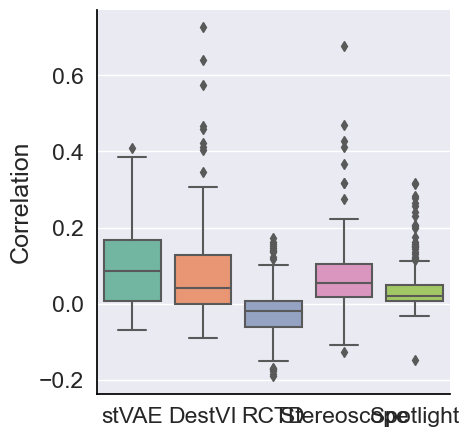

In [19]:
tmp_meth_lst = []
tmp_corr_ls = []
for mt in method_corr_dict:
    for cor in method_corr_dict[mt]:
        tmp_meth_lst.append(mt)
        tmp_corr_ls.append(cor)
corr_dict = {'method':tmp_meth_lst, 'Correlation': np.array(tmp_corr_ls)}
corr_df = pd.DataFrame.from_dict(corr_dict)

import seaborn as sns
sns.set(font_scale=1.5)
fig = sns.catplot(x="method", y="Correlation", kind="box", data=corr_df,palette="Set2", showmeans=False)
fig.set(xlabel=None)
fig.set(ylabel='Correlation')

plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_color('black')

plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black')
#fig.savefig('D:\\plot_spatial\\result_pict\\4_6\\'+"olfactory_stereo_corr_all.pdf",bbox_inches="tight",transparent=True)

In [20]:
from scipy.spatial import distance
result_ls = [stVAE_ct_label_n_test, st_adata_dest.obsm['proportions'], rctd_pred_label_n, stereo_pred_label_n, spotlight_pred_label_n]
gene_ls = []
method_jsd_dict = {'stVAE':[],'DestVI':[], 'RCTD':[],'Stereoscope':[],'Spotlight':[]}
for ct in marker_dict_n:
    corr_ls = []
    for gene in marker_dict_n[ct]:
        tmp_corr_ls = []
        y = st_adata[:,gene].X.A.T[0]
        y_0 = st_adata[list(st_adata_dest.obs_names),gene].X.A.T[0]
        for idx in range(len(result_ls)): 
            x = result_ls[idx][ct].values
            ls = []
            for ele in x:
                ls.append(ele)
            if idx == 1:
                corr = distance.jensenshannon(ls, y_0)
            else:
                corr = distance.jensenshannon(ls, y)
            tmp_corr_ls.append(corr)
            if idx == 0:
                method_jsd_dict['stVAE'].append(corr)
            if idx == 1:
                method_jsd_dict['DestVI'].append(corr)
            if idx == 2:
                method_jsd_dict['RCTD'].append(corr)
            if idx == 3:
                method_jsd_dict['Stereoscope'].append(corr)
            if idx == 4:
                method_jsd_dict['Spotlight'].append(corr)
        gene_ls.append(gene)

C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\spatial\distance.py:1287: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\spatial\distance.py:1287: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\spatial\distance.py:1287: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\scipy\spatial\distance.py:1287: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)


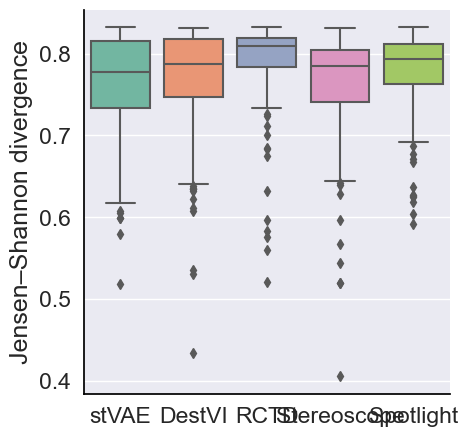

In [21]:
tmp_meth_lst = []
tmp_corr_ls = []
for mt in method_jsd_dict:
    for cor in method_jsd_dict[mt]:
        tmp_meth_lst.append(mt)
        tmp_corr_ls.append(cor)
corr_dict = {'method':tmp_meth_lst, 'Correlation': np.array(tmp_corr_ls)}
corr_df = pd.DataFrame.from_dict(corr_dict)

import seaborn as sns
sns.set(font_scale=1.5)
fig = sns.catplot(x="method", y="Correlation", kind="box", data=corr_df,palette="Set2", showmeans=False)
fig.set(xlabel=None)

plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_color('black')
fig.set(ylabel='Jensen–Shannon divergence')

plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black')
#fig.savefig('D:\\plot_spatial\\result_pict\\4_6\\'+"olfactory_stereo_jsd_all.pdf",bbox_inches="tight",transparent=True)

In [22]:
marker_dict_n_pixel = {}
marker_df = pd.read_excel('C:\\Users\\tutoradmin\\Downloads\\ob_marker.xlsx', sheet_name=None)
for index, row in marker_df['1-s2.0-S2211124718317972-mmc2'].iterrows():
    ct = row['cluster'].split('.')[1]
    marker = row['gene']
    if 'Neuron' in ct:
        continue
    if ct == 'Mf':
        ct = 'Mφ'
    if marker not in st_adata_pixel.var_names:
        continue
    if ct not in marker_dict_n_pixel:
        marker_dict_n_pixel.update({ct : [marker]})
    else:
        if len(marker_dict_n_pixel[ct]) == 5:
            continue
        marker_dict_n_pixel[ct].append(marker)
marker_df_n = pd.read_excel('C:\\Users\\tutoradmin\\Downloads\\olfactory_marker_n.xlsx', sheet_name=None)
for index, row in marker_df_n['1-s2.0-S2211124718317972-mmc3'].iterrows():
    ct = row['cluster']
    marker = row['gene']
    for tmp_ct in filter_ct_n:
        if ct in tmp_ct:
            ct = tmp_ct
    if marker not in st_adata_pixel.var_names:
        continue
    if ct not in marker_dict_n_pixel:
        marker_dict_n_pixel.update({ct : [marker]})
    else:
        if len(marker_dict_n_pixel[ct]) == 5:
            continue
        marker_dict_n_pixel[ct].append(marker)

In [23]:
ct_label_file = 'D:/Data/pixel_seq/stVAE_cell_type_proportion.csv'

ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
ct_label = ct_label_df.drop("Unnamed: 0",axis=1)

ct_label.columns = filter_ct_n
ct_label.index = st_adata_pixel.obs_names
st_adata_pixel.obs[filter_ct_n] = ct_label
pixel_50_n_test= anndata.AnnData(st_adata_pixel.X, obs=st_adata_pixel.obs, var=st_adata_pixel.var, uns=st_adata_pixel.uns,obsm=st_adata_pixel.obsm)

In [ ]:
import gc
s3= 'p99.2'
save_path = 'D:\\plot_spatial\\olfactory\\pixel-seq\\stVAE\\'
for tmp_ct in filter_ct_n:
    a = plot_spatil_test(pixel_50_n_test[select_idx_ls], tmp_ct, 1, spot_size, s3)
    if '/' in tmp_ct:
        tmp_ct = tmp_ct.split('/')[0]+'_'+tmp_ct.split('/')[1]
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()
    else:
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()

In [24]:
save_path = 'D:\\Data\\pixel_seq\\'
ct_label_file = save_path+ 'stereo_result_50_n.csv'

#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_0.csv'
#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_wild_20_0.csv'
#ct_sel_clust = ['B_naive','T_CD4+_naive','FDC']
#ct_sel_clust = ct_sc_label_list[:7]
pixel_stereo_pred_label= pd.read_csv(ct_label_file, delimiter=',', header=0)

pixel_ct_label = pixel_stereo_pred_label.drop("Unnamed: 0",axis=1)
ct_list = list(pixel_ct_label.columns)
pixel_ct_label.index = st_adata_pixel.obs_names
st_adata_pixel.obs[ct_list] = pixel_ct_label
pixel_stereoscope_n = anndata.AnnData(st_adata_pixel.X, obs=st_adata_pixel.obs, var=st_adata_pixel.var, uns=st_adata_pixel.uns,obsm=st_adata_pixel.obsm)

In [ ]:
import gc
s3= 'p99.2'
save_path = 'D:\\plot_spatial\\olfactory\\pixel-seq\\stereoscope\\'
for tmp_ct in filter_ct_n:
    a = plot_spatil_test(pixel_stereoscope_n[select_idx_ls], tmp_ct, 1, spot_size, s3)
    if '/' in tmp_ct:
        tmp_ct = tmp_ct.split('/')[0]+'_'+tmp_ct.split('/')[1]
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()
    else:
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()

In [25]:
ct_label_file = 'D://Data//pixel_seq//results_spotlight_Mouse_olfa_pixel_n.csv'

pixel_spotlight_pred_label_n = pd.read_csv(ct_label_file, delimiter=',', header=0)

tmp_ct_list = list(pixel_spotlight_pred_label_n.columns)
ct_list = []
for ct in tmp_ct_list:
    ct = ct.replace(".", "-")
    if 'M-TC' in ct:
        ct = ct.split('-')[0]+'-'+ct.split('-')[1]+'/'+ct.split('-')[2]+'-'+ct.split('-')[3]
    ct_list.append(ct)

pixel_spotlight_pred_label_n.columns = ct_list
pixel_spotlight_pred_label_n.index = st_adata_pixel.obs_names

st_adata_pixel.obs[ct_list] = pixel_spotlight_pred_label_n
pixel_spotlight_n = anndata.AnnData(st_adata_pixel.X, obs=st_adata_pixel.obs, var=st_adata_pixel.var, uns=st_adata_pixel.uns,obsm=st_adata_pixel.obsm)

In [26]:
result_ls = [pixel_50_n_test[select_idx_ls],st_adata_pixel_dest.obsm['proportions'], pixel_stereoscope_n[select_idx_ls], pixel_spotlight_n[select_idx_ls]]
gene_ls = []
method_corr_dict_thr = {'stVAE':[],'DestVI':[],'Stereoscope':[],'Spotlight':[]}
for ct in marker_dict_n_pixel:
    corr_ls = []
    for gene in marker_dict_n_pixel[ct][:2]:
        tmp_corr_ls = []
        y = st_adata_pixel[select_idx_ls][:,gene].X.A.T[0]

        for idx in range(len(result_ls)):
            if idx == 1:
                x = result_ls[idx][ct].values
            else:
                x = result_ls[idx].obs[ct].values
            ls = []
            for ele in x:
                ls.append(ele)
            #corr = distance.braycurtis(ls, y)
            #corr = distance.canberra(ls, y)/len(ls)
            if idx == 1:
                y_0 = st_adata_pixel[list(st_adata_pixel_dest.obs_names),gene].X.A.T[0]
                corr = scipy.stats.spearmanr(ls, y_0)[0]
            else:
                corr = scipy.stats.spearmanr(ls, y)[0]
            tmp_corr_ls.append(corr)
            if idx == 0:
                method_corr_dict_thr['stVAE'].append(corr)
            if idx == 1:
                method_corr_dict_thr['DestVI'].append(corr)                
            if idx == 2:
                method_corr_dict_thr['Stereoscope'].append(corr)
            if idx == 3:
                method_corr_dict_thr['Spotlight'].append(corr)
            #tmp_corr_ls.append(distance.cosine(ls, y))
        gene_ls.append(gene)

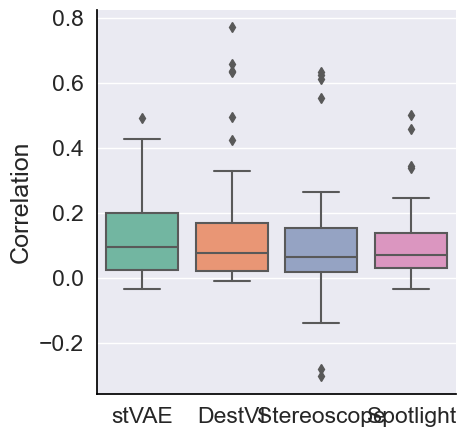

In [27]:
tmp_meth_lst = []
tmp_corr_ls = []
for mt in method_corr_dict_thr:
    for cor in method_corr_dict_thr[mt]:
        tmp_meth_lst.append(mt)
        tmp_corr_ls.append(cor)
corr_dict = {'method':tmp_meth_lst, 'Correlation': np.array(tmp_corr_ls)}
corr_df = pd.DataFrame.from_dict(corr_dict)

import seaborn as sns
sns.set(font_scale=1.5)
fig = sns.catplot(x="method", y="Correlation", kind="box", data=corr_df,palette="Set2", showmeans=False)
fig.set(xlabel=None)
fig.set(ylabel='Correlation')

plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_color('black')

plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black')
#fig.savefig('D:\\plot_spatial\\result_pict\\4_6\\'+"olfactory_pixel_corr_all.pdf",bbox_inches="tight",transparent=True)
plt.show()

In [28]:
result_ls = [pixel_50_n_test[select_idx_ls],st_adata_pixel_dest.obsm['proportions'], pixel_stereoscope_n[select_idx_ls], pixel_spotlight_n[select_idx_ls]]
gene_ls = []
pixel_method_jsd_dict = {'stVAE':[],'DestVI':[],'Stereoscope':[],'Spotlight':[]}
for ct in marker_dict_n_pixel:
    corr_ls = []
    for gene in marker_dict_n_pixel[ct][:2]:
        tmp_corr_ls = []
        y = st_adata_pixel[select_idx_ls][:,gene].X.A.T[0]

        for idx in range(len(result_ls)):
            if idx == 1:
                x = result_ls[idx][ct].values
            else:
                x = result_ls[idx].obs[ct].values
            ls = []
            for ele in x:
                ls.append(ele)
            if idx == 1:
                y_0 = st_adata_pixel[list(st_adata_pixel_dest.obs_names),gene].X.A.T[0]
                corr = distance.jensenshannon(ls, y_0)
            else:
                corr = distance.jensenshannon(ls, y)
            tmp_corr_ls.append(corr)
            if idx == 0:
                pixel_method_jsd_dict['stVAE'].append(corr)
            if idx == 1:
                pixel_method_jsd_dict['DestVI'].append(corr)                
            if idx == 2:
                pixel_method_jsd_dict['Stereoscope'].append(corr)
            if idx == 3:
                pixel_method_jsd_dict['Spotlight'].append(corr)
            #tmp_corr_ls.append(distance.cosine(ls, y))
        gene_ls.append(gene)

C:\Users\tutoradmin\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


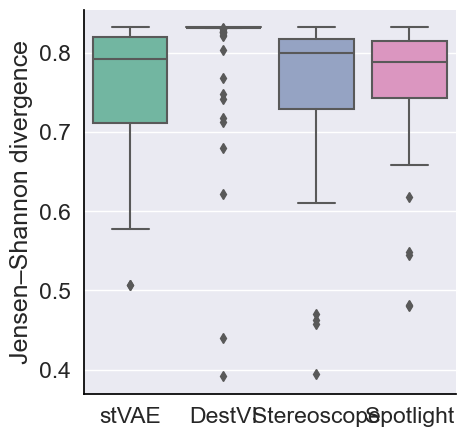

In [29]:
tmp_meth_lst = []
tmp_corr_ls = []
for mt in pixel_method_jsd_dict:
    for cor in pixel_method_jsd_dict[mt]:
        tmp_meth_lst.append(mt)
        tmp_corr_ls.append(cor)
corr_dict = {'method':tmp_meth_lst, 'Correlation': np.array(tmp_corr_ls)}
corr_df = pd.DataFrame.from_dict(corr_dict)

import seaborn as sns
sns.set(font_scale=1.5)
fig = sns.catplot(x="method", y="Correlation", kind="box", data=corr_df,palette="Set2", showmeans=False)
fig.set(xlabel=None)

plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_color('black')
fig.set(ylabel='Jensen–Shannon divergence')

plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black')
#fig.savefig('D:\\plot_spatial\\result_pict\\4_6\\'+"olfactory_pixel_jsd_all.pdf",bbox_inches="tight",transparent=True)

In [ ]:
def output_img(a,fn):
    a[0].figure.delaxes(a[0].figure.axes[1])
    divider = make_axes_locatable(a[0])
    cax = divider.append_axes("right", size="4%", pad="1.5%")
    cb = plt.colorbar(a[0].collections[0], cax=cax)
    cb.ax.tick_params(labelsize=30)
    a[0].figure.savefig(fn, format="png", bbox_inches="tight")
    gc.collect()

In [ ]:
def plot_spatil_test(tmp_slide, ct_list, ncols, spot_size, vmax):
    with mpl.rc_context({'axes.facecolor':  'black',
                         'figure.figsize': [8, 8]}):

        fig = sc.pl.spatial(tmp_slide, cmap='magma',
                      # show first 8 cell types
                      color=ct_list,
                      ncols=ncols, size=1.5,
                      img_key=None,
                      spot_size=spot_size,
                      # limit color scale at 99.2% quantile of cell abundance
                      vmin=0, vmax=vmax,
                      return_fig = True
                     )
        return fig

In [ ]:
import matplotlib as mpl
def plot_spatil_test(tmp_slide, ct_list, ncols, spot_size, vmax):
    with mpl.rc_context({'axes.facecolor':  'white',
                         'axes.visible':  'True',
                         "font.size":20,
                         'figure.figsize': [8, 8]}):

        fig = sc.pl.spatial(tmp_slide, cmap="RdPu",
                      # show first 8 cell types
                      color=ct_list,
                      title = '',
                      ncols=ncols, size=1.5,
                      img_key=None,
                      spot_size=spot_size,
                      # limit color scale at 99.2% quantile of cell abundance
                      vmin=0, vmax=vmax,
                      return_fig = True
                     )
        
        fig[0].set_xlabel('')
        fig[0].set_ylabel('')
        return fig

In [ ]:
ct_scale_list = [['Astro1','Astro1','0.4'],['OEC4','OEC4','0.4'],['n04-Immature','n04-Immature','0.4'],['n12-GC-6','n12-GC-6','0.8'],['n16-M/TC-2','n16-M_TC-2','0.6']]

In [ ]:
save_path

In [ ]:
for ele in ct_scale_list:
    s3 = ele[-1]

    save_path = 'D:\\plot_spatial\\result_pict\\4_6\\ob_stere\\'
    #s3 = s1
    cell_type = ele[0]
    tmp_ct = ele[1]
    a = plot_spatil_test(st_adata_dest, cell_type, 1, spot_size, s3)
    fn = save_path+tmp_ct+"_dest.png"
    output_img(a, fn)


In [ ]:
save_path = 'D:\\plot_spatial\\result_pict\\4_6\\ob_stere\\'

In [ ]:
ele = ['OEC4','OEC4','0.4']
s3 = ele[-1]
cell_type = ele[0]
tmp_ct = ele[1]

a = plot_spatil_test(stVAE_OB_stereo_seq, cell_type, 1, spot_size, s3)
fn = save_path+tmp_ct+"_new.png"
output_img(a, fn)


a = plot_spatil_test(slide_spotlight, cell_type, 1, spot_size, s3)
fn = save_path+tmp_ct+"_spotlight.png"
output_img(a, fn)



a = plot_spatil_test(slide_stereoscope, cell_type, 1, spot_size, s3)
fn = save_path+tmp_ct+"_stere.png"
output_img(a, fn)


a = plot_spatil_test(slide_rctd, cell_type, 1, spot_size, s3)
fn = save_path+tmp_ct+"_rctd.png"
output_img(a, fn)

In [ ]:
marker_dict_n['OEC4']

In [ ]:
import scipy.stats
import gc
from scipy.spatial import distance
for ct in marker_dict_n:
    corr_ls = []
    gene_ls =marker_dict_n[ct][:2]
    method_ls = ['stVAE','DestVI', 'RCTD', 'Stereoscope','Spotlight']
    #result_ls = [stVAE_ct_label_n[ct].values, rctd_pred_label_n[ct].values, stereo_pred_label_n[ct].values, spotlight_pred_label_n[ct].values]
    result_ls = [stVAE_ct_label_n_test[ct].values, st_adata_dest.obsm['proportions'][ct].values, rctd_pred_label_n[ct].values, stereo_pred_label_n[ct].values, spotlight_pred_label_n[ct].values]
    save_path = 'D:\\plot_spatial\\result_pict\\4_6\\ob_stere\\stVAE\\'
    for gene in gene_ls:
        tmp_corr_ls = []
        y = st_adata[:,gene].X.A.T[0]
        y_0 = st_adata[list(st_adata_dest.obs_names),gene].X.A.T[0]
        for idx in range(len(result_ls)): 
            x = result_ls[idx]
            ls = []
            for ele in x:
                ls.append(ele)
            if idx == 1:
                corr = scipy.stats.spearmanr(ls, y_0)[0]
            else:
                corr = scipy.stats.spearmanr(ls, y)[0]
            tmp_corr_ls.append(corr)
            #tmp_corr_ls.append(distance.cosine(ls, y))
        corr_ls.append(tmp_corr_ls)
    corr_arr = np.array(corr_ls)

    tmp_meth_lst = []
    tmp_gene_lst = []
    tmp_corr_ls = []
    for i in range(corr_arr.shape[0]):
        for j in range(corr_arr.shape[1]):
            tmp_gene_lst.append(gene_ls[i])
            tmp_meth_lst.append(method_ls[j])
            tmp_corr_ls.append(corr_arr[i,j])
    corr_dict = {'method':tmp_meth_lst, 'marker genes': tmp_gene_lst, 'Correlation': np.array(tmp_corr_ls)}
    corr_df = pd.DataFrame.from_dict(corr_dict)

    import seaborn as sns
    sns.set(font_scale=2)
    fig = sns.catplot(x="marker genes", y="Correlation", hue="method", kind="bar", data=corr_df,palette="Set2")
    fig._legend.remove()
    #plt.legend(bbox_to_anchor=(.45, -.4), ncol=2,loc="lower center", title=None, frameon=False,borderaxespad=0)
    fig.set(xlabel=None)
    fig.set(ylabel=None)
    fig.set(xticklabels=[])
    if '/' in ct:
        part = ct.split('/')
        ct = part[0]+'_'+part[1]
    #g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)

    fig.fig.savefig(save_path+ct+"_comp_new.pdf",bbox_inches="tight")
    gc.collect()

In [ ]:
corr_ls = []
ct = 'OEC4'
tmp_ct = 'OEC4'
gene_ls =marker_dict_n[ct][:2]

method_ls = ['stVAE','DestVI', 'RCTD', 'Stereoscope','Spotlight']
#result_ls = [stVAE_ct_label_n[ct].values, rctd_pred_label_n[ct].values, stereo_pred_label_n[ct].values, spotlight_pred_label_n[ct].values]
result_ls = [stVAE_ct_label_n_test[ct].values, st_adata_dest.obsm['proportions'][ct].values, rctd_pred_label_n[ct].values, stereo_pred_label_n[ct].values, spotlight_pred_label_n[ct].values]
save_path = 'D:\\plot_spatial\\result_pict\\4_6\\'
for gene in gene_ls:
    tmp_corr_ls = []
    y = st_adata[:,gene].X.A.T[0]
    y_0 = st_adata[list(st_adata_dest.obs_names),gene].X.A.T[0]
    for idx in range(len(result_ls)): 
        x = result_ls[idx]
        ls = []
        for ele in x:
            ls.append(ele)
        if idx == 1:
            corr = scipy.stats.spearmanr(ls, y_0)[0]
        else:
            corr = scipy.stats.spearmanr(ls, y)[0]
        tmp_corr_ls.append(corr)
        #tmp_corr_ls.append(distance.cosine(ls, y))
    corr_ls.append(tmp_corr_ls)
corr_arr = np.array(corr_ls)

tmp_meth_lst = []
tmp_gene_lst = []
tmp_corr_ls = []
for i in range(corr_arr.shape[0]):
    for j in range(corr_arr.shape[1]):
        tmp_gene_lst.append(gene_ls[i])
        tmp_meth_lst.append(method_ls[j])
        tmp_corr_ls.append(corr_arr[i,j])
corr_dict = {'method':tmp_meth_lst, 'marker genes': tmp_gene_lst, 'Correlation': np.array(tmp_corr_ls)}
corr_df = pd.DataFrame.from_dict(corr_dict)

import seaborn as sns
sns.set(font_scale=2)
fig = sns.catplot(x="marker genes", y="Correlation", hue="method", kind="bar", data=corr_df,palette="Set2")
#plt.legend(bbox_to_anchor=(.45, -.4), ncol=2,loc="lower center", title=None, frameon=False,borderaxespad=0)
fig.set(xlabel=None)
fig.set(ylabel=None)
fig.set(xticklabels=[])
if '/' in ct:
    part = ct.split('/')
    ct = part[0]+'_'+part[1]
#g[2].figure.savefig(save_path+"N16_Nxph4.svg", format="svg", bbox_inches="tight",dpi=500)
fig.fig.savefig(save_path+tmp_ct+"_comp_new_test.pdf",bbox_inches="tight")
gc.collect()

In [ ]:
import gc
s3= 'p99.2'
save_path = 'D:\\plot_spatial\\result_pict\\4_6\\ob_stere\\stVAE\\'
for tmp_ct in ct_list[29:]:
    if '/' in tmp_ct:
        a = plot_spatil_test(stVAE_OB_stereo_seq, tmp_ct, 1, spot_size, s3)
        tmp_ct = tmp_ct.split('/')[0]+'_'+tmp_ct.split('/')[1]
        fn = save_path+tmp_ct+".png"
        output_img(a, fn)
        gc.collect()

In [ ]:
cell_type = 'OEC4'
for gene in marker_dict_n[cell_type][:2]:
    a = plot_spatil_test(st_adata, gene, 1, spot_size, 'p99.2')
    fn = save_path+cell_type+'_'+gene+".png"
    output_img(a, fn)

In [ ]:
ct_scale_list = [['n11-GC-5','n11-GC-5','0.7'],['n12-GC-6','n12-GC-6','0.8'],['n15-M/TC-1','n15-M_TC-1','0.4'],['n16-M/TC-2','n16-M_TC-2','0.5'],['n17-M/TC-3','n17-M_TC-3','0.5']]
for ele in ct_scale_list:
    s3 = ele[-1]

    save_path = 'D:\\plot_spatial\\result_pict\\4_6\\ob_pixel\\'
    #s3 = s1
    cell_type = ele[0]
    tmp_ct = ele[1]
    a = plot_spatil_test(st_adata_pixel_dest[dest_select_idx_ls], cell_type, 1, spot_size, s3)
    fn = save_path+tmp_ct+"_pixel_dest.png"
    output_img(a, fn)

In [ ]:
ct_scale_list = [['n11-GC-5','n11-GC-5','0.7'],['n12-GC-6','n12-GC-6','0.8'],['n15-M/TC-1','n15-M_TC-1','0.4'],['n16-M/TC-2','n16-M_TC-2','0.5'],['n17-M/TC-3','n17-M_TC-3','0.5']]


In [ ]:
for ele_ct in ct_scale_list:
    ct = ele_ct[0]

    gene_ls = marker_dict_n_pixel[ct][:2]
    method_ls = ['stVAE', 'DestVI','Stereoscope','Spotlight']

    result_ls = [pixel_50_n_test[select_idx_ls], st_adata_pixel_dest, pixel_stereoscope_n[select_idx_ls], pixel_spotlight_n[select_idx_ls]]
    #result_ls = [stVAE_ct_label_961[ct].values, rctd_pred_label[ct].values, stereo_pred_label[ct].values, spotlight_pred_label[ct].values]

    corr_ls = []
    #gene_ls = select_ct_marker_dict[ct]
    for gene in gene_ls:
        tmp_corr_ls = []
        y = pixel_50_n_test[select_idx_ls,gene].X.A.T[0]
        for idx in range(len(result_ls)): 
            x = result_ls[idx].obs[ct].values
            ls = []
            for ele in x:
                ls.append(ele)
            if idx == 1:
                y_0 = st_adata_pixel[list(st_adata_pixel_dest.obs_names),gene].X.A.T[0]
                corr = scipy.stats.spearmanr(ls, y_0)[0]
            else:
                corr = scipy.stats.spearmanr(ls, y)[0]
            tmp_corr_ls.append(corr)
            #tmp_corr_ls.append(distance.cosine(ls, y))
        corr_ls.append(tmp_corr_ls)
    corr_arr = np.array(corr_ls)


    tmp_meth_lst = []
    tmp_gene_lst = []
    tmp_corr_ls = []
    for i in range(corr_arr.shape[0]):
        for j in range(corr_arr.shape[1]):
            tmp_gene_lst.append(gene_ls[i])
            tmp_meth_lst.append(method_ls[j])
            tmp_corr_ls.append(corr_arr[i,j])
    corr_dict = {'method':tmp_meth_lst, 'marker genes': tmp_gene_lst, 'Correlation': np.array(tmp_corr_ls)}
    corr_df = pd.DataFrame.from_dict(corr_dict)

    import seaborn as sns
    sns.set(font_scale=2)
    fig = sns.catplot(x="marker genes", y="Correlation", hue="method", kind="bar", data=corr_df,palette="Set2")
    fig._legend.remove()
    #plt.legend(bbox_to_anchor=(.45, -.4), ncol=2,loc="lower center", title=None, frameon=False,borderaxespad=0)
    fig.set(xlabel=None)
    fig.set(ylabel=None)
    fig.set(xticklabels=[])
    if '/' in ct:
        ct = ct.split('/')[0]+'_'+ct.split('/')[1]
    fig.fig.savefig('D:\\plot_spatial\\result_pict\\4_6\\ob_pixel\\'+ct+"_pixel_comp_new.pdf",bbox_inches="tight")

In [ ]:
ct = 'n04-Immature'
ct = 'n12-GC-6'
#ct = 'n16-M/TC-2'
#ct = 'n17-M/TC-3'
gene_ls = ['Tpbg', 'Cplx1']
#gene_ls = ['Dbi', 'S100b']
method_ls = ['stVAE', 'Stereoscope','Spotlight']

result_ls = [pixel_50_n_test[select_idx_ls], st_adata_pixel_dest.obsm['proportions'], pixel_stereoscope_n[select_idx_ls], pixel_spotlight_n[select_idx_ls]]
#result_ls = [stVAE_ct_label_961[ct].values, rctd_pred_label[ct].values, stereo_pred_label[ct].values, spotlight_pred_label[ct].values]

corr_ls = []
#gene_ls = select_ct_marker_dict[ct]
for gene in gene_ls:
    tmp_corr_ls = []
    y = pixel_50_n_test[select_idx_ls,gene].X.A.T[0]
    for idx in range(len(result_ls)): 
        x = result_ls[idx].obs[ct].values
        ls = []
        for ele in x:
            ls.append(ele)
        if idx == 1:
            y_0 = st_adata_pixel[list(st_adata_pixel_dest.obs_names),gene].X.A.T[0]
            corr = scipy.stats.spearmanr(ls, y_0)[0]
        else:
            corr = scipy.stats.spearmanr(ls, y)[0]
        tmp_corr_ls.append(corr)
        #tmp_corr_ls.append(distance.cosine(ls, y))
    corr_ls.append(tmp_corr_ls)
corr_arr = np.array(corr_ls)


tmp_meth_lst = []
tmp_gene_lst = []
tmp_corr_ls = []
for i in range(corr_arr.shape[0]):
    for j in range(corr_arr.shape[1]):
        tmp_gene_lst.append(gene_ls[i])
        tmp_meth_lst.append(method_ls[j])
        tmp_corr_ls.append(corr_arr[i,j])
corr_dict = {'method':tmp_meth_lst, 'marker genes': tmp_gene_lst, 'Correlation': np.array(tmp_corr_ls)}
corr_df = pd.DataFrame.from_dict(corr_dict)

import seaborn as sns
sns.set(font_scale=2)
fig = sns.catplot(x="marker genes", y="Correlation", hue="method", kind="bar", data=corr_df,palette="Set2")
fig._legend.remove()
#plt.legend(bbox_to_anchor=(.45, -.4), ncol=2,loc="lower center", title=None, frameon=False,borderaxespad=0)
fig.set(xlabel=None)
fig.set(ylabel=None)
fig.set(xticklabels=[])
if '/' in ct:
    ct = ct.split('/')[0]+'_'+ct.split('/')[1]
fig.fig.savefig(save_path+ct+"_pixel_comp_new.pdf",bbox_inches="tight")

In [ ]:
brain_st_adata_dest=anndata.read_h5ad('D:\\Data\\for_publication\\mouse_brain\\destvi_prop.h5ad')
brain_st_adata_dest.obs[brain_st_adata_dest.obsm['proportions'].columns] = brain_st_adata_dest.obsm['proportions']

In [ ]:
ct_lst = ['TEGLU2','TEGLU3','TEGLU7','TEGLU8','TEGLU10']
scale_dict = {'TEGLU2':'0.35','TEGLU3':'0.4','TEGLU7':'0.5','TEGLU8':'0.35','TEGLU10':'0.35'}

In [ ]:
def plot_spatil_test(tmp_slide, ct_list, ncols, spot_size, vmax):
    with mpl.rc_context({'axes.facecolor':  'white',
                         "font.size":20,
                         'figure.figsize': [8, 8]}):

        fig = sc.pl.spatial(tmp_slide, cmap="RdPu",
                      # show first 8 cell types
                      color=ct_list,
                      title = '',
                      ncols=ncols, size=1.5,
                      img_key=None,
                      spot_size=spot_size,
                      # limit color scale at 99.2% quantile of cell abundance
                      vmin=0, vmax=vmax,
                      return_fig = True
                     )
        fig[0].set_xlabel('')
        fig[0].set_ylabel('')
        return fig

In [ ]:
import gc
for i in range(1,25):
    ct = 'TEGLU'+str(i)
    a=plot_spatil_test(brain_st_adata_dest,ct,1, spot_size,'p99.2')
    gc.collect()

In [ ]:
plot_path = 'D:\\plot_spatial\\result_pict\\4_6\\mouse_brain\\destvi\\0.1\\'
spot_size =20
for i in range(1,25):
    ct = 'TEGLU'+str(i)
    if ct not in list(brain_st_adata_dest.obsm['proportions'].columns):
        continue
    if i not in [11, 17, 24]:
        scale = '0.1'
        a=plot_spatil_test(brain_st_adata_dest,ct,1, spot_size,scale)
        a[0].figure.delaxes(a[0].figure.axes[1])

        divider = make_axes_locatable(a[0])
        cax = divider.append_axes("right", size="4%", pad="1.5%")
        cb = plt.colorbar(a[0].collections[0], cax=cax)
        cb.ax.tick_params(labelsize=30)
        a[0].figure.savefig(plot_path+ct+".png", format="png", bbox_inches="tight")
        #a[0].figure.savefig(plot_path+"test.png", format="png", bbox_inches="tight")
        #del a
        import gc
        gc.collect()

In [ ]:
plot_path = 'D:\\plot_spatial\\result_pict\\4_6\\mouse_brain\\'
spot_size =20
for ct in ct_lst:
    scale = scale_dict[ct]
    a=plot_spatil_test(brain_st_adata_dest,ct,1, spot_size,scale)
    a[0].figure.delaxes(a[0].figure.axes[1])

    divider = make_axes_locatable(a[0])
    cax = divider.append_axes("right", size="4%", pad="1.5%")
    cb = plt.colorbar(a[0].collections[0], cax=cax)
    cb.ax.tick_params(labelsize=30)
    a[0].figure.savefig(plot_path+ct+".png", format="png", bbox_inches="tight")
    #a[0].figure.savefig(plot_path+"test.png", format="png", bbox_inches="tight")
    #del a
    import gc
    gc.collect()



In [ ]:
st_adata_brain=anndata.read_h5ad('D:\\Data\\stereo-seq\\SS200000135TL_D1_20.spatial.cluster.h5ad')


In [ ]:
file_path = 'D:/Data/stereo-seq/20/stVAE_mu_gene_expression.csv'
raw_mu_expr = pd.read_csv(file_path,index_col=0)
filter_ct_brain = list(raw_mu_expr.index)

In [ ]:
ct_label_file = 'D:/Data/stereo-seq/20/stVAE_cell_type_proportion.csv'

ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
stVAE_ct_label = ct_label_df.drop("Unnamed: 0",axis=1)

In [ ]:
stVAE_ct_label.columns = filter_ct_brain
stVAE_ct_label.index = st_adata_brain.obs_names
st_adata_brain.obs[filter_ct_brain] = stVAE_ct_label
stVAE_brain_slide= anndata.AnnData(st_adata_brain.X, obs=st_adata_brain.obs, var=st_adata_brain.var, uns=st_adata_brain.uns,obsm=st_adata_brain.obsm)

In [ ]:
import gc
plot_path = 'D:\\plot_spatial\\mouse_brain\\stVAE\\'
for i in range(1,25):
    ct = 'TEGLU'+str(i)
    if ct not in list(filter_ct_brain):
        continue
    a=plot_spatil_test(stVAE_brain_slide,ct,1, 20,'p99.2')
    a[0].figure.delaxes(a[0].figure.axes[1])

    divider = make_axes_locatable(a[0])
    cax = divider.append_axes("right", size="4%", pad="1.5%")
    cb = plt.colorbar(a[0].collections[0], cax=cax)
    cb.ax.tick_params(labelsize=30)
    a[0].figure.savefig(plot_path+ct+".png", format="png", bbox_inches="tight")
    del a
    import gc
    gc.collect()

In [ ]:
save_path = 'D:\\Data\\stereo-seq\\20\\'

ct_label_file = save_path+ 'stere_result_20.csv'

#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_0.csv'
#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_wild_20_0.csv'
#ct_sel_clust = ['B_naive','T_CD4+_naive','FDC']
#ct_sel_clust = ct_sc_label_list[:7]
stereo_pred_label = pd.read_csv(ct_label_file, delimiter=',', header=0)

In [ ]:
marker_df = pd.read_excel('D:/Data/stereo-seq/mmc4.xlsx', sheet_name=None)
tmp_gene_marker_dict = {} 
for index, row in marker_df['markers_spec_selec_rob_10-May-2'].iterrows():
    if row['Unnamed: 1'] == 'Marker':
        ct = row['Cluster ID']
        if 'TEGLU' not in ct:
            continue
        tmp_marker_lst = [row['Gene1'], row['Gene2'], row['Gene3'], row['Gene4'], row['Gene5']]
        marker_lst = []
        for m_gene in tmp_marker_lst:
            if m_gene in st_adata_brain.var_names:
                marker_lst.append(m_gene)
                if len(marker_lst) == 2:
                    break
        if len(marker_lst) == 0:
            continue
        tmp_gene_marker_dict.update({ct : marker_lst})

In [ ]:
marker_df = pd.read_excel('D:/Data/stereo-seq/mmc4.xlsx', sheet_name=None)
tmp_gene_marker_dict = {} 
for index, row in marker_df['markers_spec_selec_rob_10-May-2'].iterrows():
    if row['Unnamed: 1'] == 'Marker':
        ct = row['Cluster ID']
        if ct not in filter_ct_brain:
            continue
        tmp_marker_lst = [row['Gene1'], row['Gene2'], row['Gene3'], row['Gene4'], row['Gene5']]
        marker_lst = []
        for m_gene in tmp_marker_lst:
            if m_gene in st_adata_brain.var_names:
                marker_lst.append(m_gene)
                if len(marker_lst) == 2:
                    break
        if len(marker_lst) == 0:
            continue
        tmp_gene_marker_dict.update({ct : marker_lst})

In [ ]:
import scipy
result_ls = [stVAE_ct_label,brain_st_adata_dest.obsm['proportions'], stereo_pred_label]
gene_ls = []
method_corr_dict = {'stVAE':[],'DestVI':[],'Stereoscope':[]}
for i in range(1,25):
    ct = 'TEGLU'+str(i)
    if ct not in list(tmp_gene_marker_dict.keys()) or ct not in filter_ct_brain:
        continue
    for gene in tmp_gene_marker_dict[ct]:
        tmp_corr_ls = []
        y = st_adata_brain[:,gene].X.A.T[0]
        y_0 = st_adata_brain[list(brain_st_adata_dest.obs_names),gene].X.A.T[0]
        for idx in range(len(result_ls)): 
            x = result_ls[idx][ct].values
            ls = []
            for ele in x:
                ls.append(ele)
            if idx == 1:
                corr = scipy.stats.spearmanr(ls, y_0)[0]
            else:
                corr = scipy.stats.spearmanr(ls, y)[0]
            tmp_corr_ls.append(corr)
            if idx == 0:
                method_corr_dict['stVAE'].append(corr)
            if idx == 1:
                method_corr_dict['DestVI'].append(corr)
                print(str(corr)+ct)
            if idx == 2:
                method_corr_dict['Stereoscope'].append(corr)
            #tmp_corr_ls.append(distance.cosine(ls, y))
        gene_ls.append(gene)

In [ ]:
for i in range(1,25):
    ct = 'TEGLU'+str(i)
    print(ct+str())

In [ ]:
import scipy
result_ls = [stVAE_ct_label,brain_st_adata_dest.obsm['proportions'], stereo_pred_label]

gene_ls = []
method_corr_dict = {'stVAE':[],'DestVI':[],'Stereoscope':[]}
for ct in tmp_gene_marker_dict:
    if ct not in filter_ct_brain or ct not in list(brain_st_adata_dest.obsm['proportions'].columns):
        continue
    for gene in tmp_gene_marker_dict[ct]:
        tmp_corr_ls = []
        y = st_adata_brain[:,gene].X.A.T[0]
        y_0 = st_adata_brain[list(brain_st_adata_dest.obs_names),gene].X.A.T[0]
        for idx in range(len(result_ls)): 
            x = result_ls[idx][ct].values
            ls = []
            for ele in x:
                ls.append(ele)
            if idx == 1:
                continue
                corr = scipy.stats.spearmanr(ls, y_0)[0]
            else:
                corr = scipy.stats.spearmanr(ls, y)[0]
            tmp_corr_ls.append(corr)
            if idx == 0:
                method_corr_dict['stVAE'].append(corr)
            if idx == 1:
                continue
                method_corr_dict['DestVI'].append(corr)                
            if idx == 2:
                method_corr_dict['Stereoscope'].append(corr)
            #tmp_corr_ls.append(distance.cosine(ls, y))
        gene_ls.append(gene)

In [ ]:
tmp_meth_lst = []
tmp_corr_ls = []
for mt in method_corr_dict:
    if mt == 'DestVI':
        continue
    for cor in method_corr_dict[mt]:
        tmp_meth_lst.append(mt)
        tmp_corr_ls.append(cor)
corr_dict = {'method':tmp_meth_lst, 'Correlation': np.array(tmp_corr_ls)}
corr_df = pd.DataFrame.from_dict(corr_dict)

import seaborn as sns
sns.set(font_scale=1.5)
fig = sns.catplot(x="method", y="Correlation", kind="box", data=corr_df,palette="Set2",showmeans=False)
fig.set(xlabel=None)
fig.set(ylabel='Correlation')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_color('black')

plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black')
#plt.show()
fig.savefig('D:\\plot_spatial\\result_pict\\4_6\\mouse_brain\\mouse_brain_new_all.pdf',bbox_inches="tight",transparent=True)
#fig.savefig("D:\\plot_spatial\\mouse_brain\\1857\\mouse_brain_all_tmp.pdf",bbox_inches="tight",transparent=True)

In [ ]:
fig.set(xlabel=None)

plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_color('black')
fig.set(ylabel='Jensen–Shannon divergence')

plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black')

In [ ]:
marker_df = pd.read_excel('D:/Data/stereo-seq/mmc4.xlsx', sheet_name=None)
all_gene_marker_dict = {} 
for index, row in marker_df['markers_spec_selec_rob_10-May-2'].iterrows():
    if row['Unnamed: 1'] == 'Marker':
        ct = row['Cluster ID']
        #if 'TEGLU' not in ct:
        #    continue
        tmp_marker_lst = [row['Gene1'], row['Gene2'], row['Gene3'], row['Gene4'], row['Gene5']]
        if ct == 'TEGLU10':
            break

In [ ]:
st_adata=anndata.read_h5ad('D:\\Data\\Slide-seqV2\\mouse_hippocampus\\Puck_200115_08.h5ad')
file_path = 'D:\\Data\\Slide-seqV2\\mouse_hippocampus\\stVAE_mu_gene_expression.csv'
raw_mu_expr_1841 = pd.read_csv(file_path,index_col=0)
filter_ct = list(raw_mu_expr_1841.index)

sim_spot_name = pd.read_csv('D:\\Data\\Slide-seqV2\\mouse_hippocampus\\spot_name_slide_seq2_10.csv',header=None)
selected_spot_lst = []
for spot in sim_spot_name.values:
    selected_spot_lst.append(spot[0])
    
selected_st_adata = st_adata[selected_spot_lst,:]
sim_result = pd.read_csv('D:\\Data\\Slide-seqV2\\mouse_hippocampus\\result_slide_seq2_10.csv',header=None)
sim_result_ls = []
#filter_ct.sort()
for i in range(sim_result.values.shape[1]):
    tmp_ls = []
    for ele in sim_result.values[0][i].split('|'):
        tmp_ls.append(float(ele))
    sim_result_ls.append(tmp_ls)
    
spot_idx_dict = {}
for idx in range(len(list(st_adata.obs_names))):
    spot_idx_dict.update({list(st_adata.obs_names)[idx]:idx})
    
rctd_result = np.zeros([len(st_adata.obs_names),len(filter_ct)])
for idx in range(len(selected_spot_lst)):
    spot_name = selected_spot_lst[idx]
    pred = sim_result_ls[idx]
    pos_idx = spot_idx_dict[spot_name]
    rctd_result[pos_idx,:] = pred
#rctd_pred_label_n = pd.DataFrame(data=rctd_result, columns=rctd_ct_ls, index=st_adata.obs_names )
    
    
    
rctd_ct_label = pd.DataFrame(data=np.array(rctd_result), columns=filter_ct, index=st_adata.obs_names )
st_adata.obs[filter_ct] = rctd_ct_label
tmp_slide_rctd = anndata.AnnData(st_adata.X, obs=st_adata.obs, var=st_adata.var, uns=st_adata.uns,obsm=st_adata.obsm)

In [ ]:


st_adata_pixel_dest=anndata.read_h5ad('D:\\Data\\for_publication\\mouse_brain\\slide-seqV2\\destvi_prop.h5ad')
st_adata_pixel_dest.obs[st_adata_pixel_dest.obsm['proportions'].columns] = st_adata_pixel_dest.obsm['proportions']

In [ ]:
ct_list = ['TEGLU2', 'TEGLU4', 'TEGLU10', 'TEGLU8', 'TEGLU17']
ct_scale_dict = {'TEGLU2':'0.4','TEGLU4':'0.6','TEGLU8':'0.45','TEGLU10':'0.45','TEGLU17':'0.2'}
ct_scale_dict = {'TEGLU17':'0.16'}

In [ ]:
for ct in ct_scale_dict:
    spot_size =15
    scale = ct_scale_dict[ct]
    a=plot_spatil_test(st_adata_pixel_dest,ct,1, spot_size,scale)
    a[0].figure.delaxes(a[0].figure.axes[1])

    divider = make_axes_locatable(a[0])
    cax = divider.append_axes("right", size="4%", pad="1.5%")
    cb = plt.colorbar(a[0].collections[0], cax=cax)
    cb.ax.tick_params(labelsize=30)
    a[0].figure.savefig('D:\\plot_spatial\\result_pict\\4_6\\slide-seq\\'+ct+".png", format="png", bbox_inches="tight")
    #a[0].figure.savefig(plot_path+"test.png", format="png", bbox_inches="tight")
    #del a
    import gc
    gc.collect()

In [ ]:
save_path = 'D:\\Data\\Slide-seqV2\\mouse_hippocampus\\'
ct_label_file = save_path+ 'stVAE_cell_type_proportion.csv'

#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_0.csv'
#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_wild_20_0.csv'
#ct_sel_clust = ['B_naive','T_CD4+_naive','FDC']
#ct_sel_clust = ct_sc_label_list[:7]
ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
ct_label = ct_label_df.drop("Unnamed: 0",axis=1)

ct_label.columns = filter_ct
ct_label.index = st_adata.obs_names
st_adata.obs[filter_ct] = ct_label
tmp_slide_scale_add_merge_fast_005 = anndata.AnnData(st_adata.X, obs=st_adata.obs, var=st_adata.var, uns=st_adata.uns,obsm=st_adata.obsm)

tmp_slide_scale_add_merge_fast_005_tmp = tmp_slide_scale_add_merge_fast_005[selected_spot_lst]

save_path = 'D:\\Data\\Slide-seqV2\\mouse_hippocampus\\'
ct_label_file = save_path+ 'slide_result_stereoscope.csv'

#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_0.csv'
#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_wild_20_0.csv'
#ct_sel_clust = ['B_naive','T_CD4+_naive','FDC']
#ct_sel_clust = ct_sc_label_list[:7]
ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
stere_ct_label = ct_label_df.drop("Unnamed: 0",axis=1)

ct_list = list(stere_ct_label.columns)
stere_ct_label.index = st_adata.obs_names
st_adata.obs[ct_list] = stere_ct_label
slide_stereoscope = anndata.AnnData(st_adata.X, obs=st_adata.obs, var=st_adata.var, uns=st_adata.uns,obsm=st_adata.obsm)

ct_label_file = 'D:\\Data\\Slide-seqV2\\mouse_hippocampus\\results_spotlight_Puck_200115_08.csv'

ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
ct_list = []
tmp_ct_list = []
for ct in list(ct_label_df.columns):
    new_ct = ct.replace('.','_')
    tmp_ct_list.append(new_ct)
    ct_list.append(new_ct)

ct_label_df.columns = ct_list
spotlight_ct_label = ct_label_df


spotlight_result = []
for i in range(ct_label_df.values.shape[0]):
    spot_res = ct_label_df.values[i]
    tmp_ls = []
    for ct in tmp_ct_list:
        if ct == 'res_ss':
            continue
        idx = ct_list.index(ct)
        tmp_ls.append(spot_res[idx])
    spotlight_result.append(tmp_ls)
    
spotlight_result = np.array(spotlight_result)

ct_list = list(ct_label_df.columns)
ct_label_df.index = st_adata.obs_names
st_adata.obs[ct_list] = ct_label_df
slide_spotlight = anndata.AnnData(st_adata.X, obs=st_adata.obs, var=st_adata.var, uns=st_adata.uns,obsm=st_adata.obsm)


In [ ]:
select_dest_spot_ls = []
for spot in selected_spot_lst:
    if spot in st_adata_pixel_dest.obs_names:
        select_dest_spot_ls.append(spot)

In [ ]:
result_ls[idx]

In [ ]:
method_ls = ['stVAE','DestVI', 'RCTD', 'Stereoscope','Spotlight']
ct_list = ['TEGLU2', 'TEGLU4', 'TEGLU10', 'TEGLU8', 'TEGLU17']
result_ls = [tmp_slide_scale_add_merge_fast_005_tmp, st_adata_pixel_dest, tmp_slide_rctd, slide_stereoscope, slide_spotlight]
import scipy
from scipy.stats import spearmanr
for ct in ct_list:
    corr_ls = []
    gene_ls = tmp_gene_marker_dict[ct]
    for gene in gene_ls:
        tmp_corr_ls = []
        y = st_adata[select_dest_spot_ls, gene].X.A.T[0]
        y_0 = st_adata[select_dest_spot_ls,gene].X.A.T[0]
        for idx in range(len(result_ls)): 
            x = result_ls[idx][select_dest_spot_ls].obs[ct].values
            ls = []
            for ele in x:
                ls.append(ele)
            if idx == 1:
                corr = scipy.stats.spearmanr(ls, y_0)[0]
            else:
                corr = scipy.stats.spearmanr(ls, y)[0]
            tmp_corr_ls.append(corr)
        corr_ls.append(tmp_corr_ls)
    corr_arr = np.array(corr_ls)

    tmp_meth_lst = []
    tmp_gene_lst = []
    tmp_corr_ls = []
    for i in range(corr_arr.shape[0]):
        for j in range(corr_arr.shape[1]):
            tmp_gene_lst.append(gene_ls[i])
            tmp_meth_lst.append(method_ls[j])
            tmp_corr_ls.append(corr_arr[i,j])
    corr_dict = {'method':tmp_meth_lst, 'marker genes': tmp_gene_lst, 'Correlation': np.array(tmp_corr_ls)}
    corr_df = pd.DataFrame.from_dict(corr_dict)
    import seaborn as sns
    sns.set(font_scale=2)
    fig = sns.catplot(x="marker genes", y="Correlation", hue="method", kind="bar", data=corr_df,palette="Set2")
    fig._legend.remove()
    fig.set(xlabel=None)
    fig.set(ylabel=None)
    fig.set(xticklabels=[])
    fig.fig.savefig('D:\\plot_spatial\\result_pict\\4_6\\slide-seq\\'+ct+"_comp.pdf",bbox_inches="tight")
    gc.collect()

In [ ]:
st_adata_embryo_dest=anndata.read_h5ad('D:\\Data\\for_publication\\embryo\\destvi_prop_1000.h5ad')
st_adata_embryo_dest.obs[st_adata_embryo_dest.obsm['proportions'].columns] = st_adata_embryo_dest.obsm['proportions']

In [ ]:
ct_marker_dict = {'17-6':['Col11a1','Col2a1'],'17-11':['Adamts6','Adamtsl1'],'17-13':['Ina','Map1b'],'17-15':['Camk1d','Gm42418'],'17-18':['Kif26b','Nbea']}
scale_dict = {'17-6':'0.5','17-11':'0.2','17-13':'0.5','17-15':'0.6','17-18':'0.05'}

In [ ]:
plot_path = 'D:\\plot_spatial\\result_pict\\4_6\\embryo\\'
spot_size =20
for ct in ct_marker_dict.keys():
    scale = scale_dict[ct]

    a=plot_spatil_test(st_adata_embryo_dest,ct,1, spot_size,scale)
    a[0].figure.delaxes(a[0].figure.axes[1])

    divider = make_axes_locatable(a[0])
    cax = divider.append_axes("right", size="4%", pad="1.5%")
    cb = plt.colorbar(a[0].collections[0], cax=cax)
    cb.ax.tick_params(labelsize=30)
    a[0].figure.savefig(plot_path+ct+".png", format="png", bbox_inches="tight")
    #a[0].figure.savefig(plot_path+"test.png", format="png", bbox_inches="tight")
    #del a
    import gc
    gc.collect()

In [ ]:
ct_label_file = 'D:/Data/stereo-seq/embryo/sub/stVAE_cell_type_proportion.csv'

ct_label_df = pd.read_csv(ct_label_file, delimiter=',', header=0)
stVAE_ct_label_2426_0 = ct_label_df.drop("Unnamed: 0",axis=1)

In [ ]:
file_path = 'D:/Data/stereo-seq/embryo/sub/stVAE_mu_gene_expression.csv'
raw_mu_expr = pd.read_csv(file_path,index_col=0)
filter_ct_20 = list(raw_mu_expr.index)
stVAE_ct_label_2426_0.columns = filter_ct_20
stVAE_ct_label_2426_0.index = st_adata_20.obs_names

In [ ]:
ct_label_file = 'D:/Data/stereo-seq/embryo/sub/result_sub_1000.csv'

#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_0.csv'
#ct_label_file = 'D:/Data/Peking_Union/NF/pred_NF_st_wild_20_0.csv'
#ct_sel_clust = ['B_naive','T_CD4+_naive','FDC']
#ct_sel_clust = ct_sc_label_list[:7]
stereo_pred_label= pd.read_csv(ct_label_file, delimiter=',', header=0)

In [ ]:
ct_marker_dict = {'17-6':['Col11a1','Col2a1'],'17-11':['Adamts6','Adamtsl1'],'17-13':['Ina','Map1b'],'17-15':['Camk1d','Gm42418'],'17-18':['Kif26b','Nbea']}


In [ ]:
st_adata_20=anndata.read_h5ad('D:/Data/stereo-seq/embryo/20/E12.5_E1S1_GEM_bin20.h5ad')


In [ ]:
import scipy.stats
import gc
from scipy.spatial import distance
save_path = 'D:\\plot_spatial\\result_pict\\4_6\\embryo\\'
method_ls = ['stVAE','DestVI', 'Stereoscope']
result_ls = [stVAE_ct_label_2426_0,st_adata_embryo_dest.obsm['proportions'], stereo_pred_label]
ct_marker_dict = {'17-6':['Col11a1','Col2a1'],'17-11':['Adamts6','Adamtsl1'],'17-13':['Ina','Map1b'],'17-15':['Camk1d','Gm42418'],'17-18':['Kif26b','Nbea']}
for ct in ct_marker_dict.keys():
    corr_ls = []
    gene_ls =ct_marker_dict[ct][:2]

    for gene in gene_ls:
        tmp_corr_ls = []
        y = st_adata_20[:,gene].X.A.T[0]
        for idx in range(len(result_ls)): 
            x = result_ls[idx][ct].values
            ls = []
            for ele in x:
                ls.append(ele)
            if idx == 1:
                y_0 = st_adata_20[list(st_adata_embryo_dest.obs_names),gene].X.A.T[0]
                corr = scipy.stats.spearmanr(ls, y_0)[0]
            else:
                corr = scipy.stats.spearmanr(ls, y)[0]
            tmp_corr_ls.append(corr)
        corr_ls.append(tmp_corr_ls)
    corr_arr = np.array(corr_ls)

    tmp_meth_lst = []
    tmp_gene_lst = []
    tmp_corr_ls = []
    for i in range(corr_arr.shape[0]):
        for j in range(corr_arr.shape[1]):
            tmp_gene_lst.append(gene_ls[i])
            tmp_meth_lst.append(method_ls[j])
            tmp_corr_ls.append(corr_arr[i,j])
    corr_dict = {'method':tmp_meth_lst, 'marker genes': tmp_gene_lst, 'Correlation': np.array(tmp_corr_ls)}
    corr_df = pd.DataFrame.from_dict(corr_dict)

    import seaborn as sns
    sns.set(font_scale=2)
    fig = sns.catplot(x="marker genes", y="Correlation", hue="method", kind="bar", data=corr_df,palette="Set2")
    fig._legend.remove()
    #plt.legend(bbox_to_anchor=(.45, -.4), ncol=2,loc="lower center", title=None, frameon=False,borderaxespad=0)
    fig.set(xlabel=None)
    fig.set(ylabel=None)
    fig.set(xticklabels=[])
    fig.fig.savefig(save_path+ct+"_comp.pdf",bbox_inches="tight")
gc.collect()